---

# Proyecto: FashionPixel

**Equipo de Aprendizaje Automático - UCV**

Guillermo Hernández - C.I.: V-27.369.180

Héctor Guevara - C.I.: V-10.347.014

José Torres - C.I.: V-23.616.754

---

## 1. Explicación del Problema

En el mundo actual, la moda juega un papel fundamental en la expresión personal, la comunicación social y la economía global. Desdes la elección de nuestra vestimenta diaria hasta las tendencias que marcan las pasarelas, la ropa es un lenguaje visual que siempre está presente. Sin embargo, identificar y categorizar las prendas que vemos en nuestro entorno, ya sea en fotos, redes sociales o incluso en nuestro propio armario, puede ser una tarea desafiante y a menudo subjetiva.

En esta intersección entre la moda y la tecnología es donde nuestra innovadora aplicación entra en juego. Presentamos un sistema robusto y versátil, compuesto por una aplicación web interactiva desarrolada con Streamlit para una experiencia de usuario intuitiva, y una API potente construida con FastAPI para ofrecer la funcionalidad de nuestro sistema a otras aplicaciones y servicios. Ambas herramientas se basan en un modelo de aprendizaje automatico avanzado entrenado con un extenso conjunto de datos diseñado para transformar la manera en que interactuamos con la información visual sobre vestimenta.

Imagina la capacidad de simplemente cargar una imagen a través de una interfaz web amigable y, en cuestion de segundos, obtener una identificación precisa del tipo de prenda que aparece en ella. O la flexibilidad de integrar esta misma capacidad de reconomiento en otras aplicaciones o flujos de trabajo a traves de una API confiable y de alto rendimiento. Nuestra solución ofrece ambas posibilidades, desbloqueando un abanico de oportunidades para diversos usuarios:

- **Entusiastas de la moda**: Descubran y cataloguen las últimas tendencias, analicen estilos y amplíen su conocimiento sobre diferentes tipos de prendas a través de una interfaz visual atractiva.
- **Compradores en línea**: Obtengan información instantánea sobre las prendas que les interesan en imágenes, facilitando la búsqueda y comparación de productos similares, ya sea directamente en la aplicación o a través de servicios integrados.
- **Desarrolladores y empresas**: Integren la potente funcionalidad de identificación de prendas en sus propias plataformas, aplicaciones móviles o sistemas internos a través de la API, optimizando la gestión de inventario, mejorando la experiencia del usuario o potenciando el análisis de tendencias a gran escala.

Nuestra solución no es solo una herramienta de reconocimiento de imágenes; es una plataforma integral que ofrece tanto una interfaz de usuario accesible como una interfaz de programación robusta para una comprensión más profunda del mundo de la moda a través del análisis visual inteligente. Al automatizar la identificación de tipos de prendas, liberamos tiempo y reducimos la incertidumbre, permitiendo a los usuarios y a otras aplicaciones centrarse en lo que realmente importa: la creatividad, el estilo y la conexión personal con la moda, así como la integración fluida de esta tecnología en diversos contextos.

Este reporte detalla el exhaustivo proceso de desarrollo que ha dado vida a esta solución integral desde la cuidadosa selección y preparación de los datos hasta la arquitectura del modelo que impulsa su capacidad predictiva, pasando por la intuitiva interfaz creada con Streamlit y la robusta API desarrollada con FastAPI. Acompáñenos en este viaje mientras exploramos cómo la inteligencia artificial está redefiniendo la forma en la que percibimos y entendemos la moda visual, ofreciendo soluciones tanto para usuarios finales como para integraciones de software.

---

## 2. Análisis de Datos

En esta sección, realizaremos un análisis exploratorio de los datos del dataset FashionMNIST para comprender su estructura, las categorías de prendas presentes y la distribución de estas categorías. Este análisis nos proporcionará información valiosa para las etapas posteriores de preprocesamiento y selección de modelos.

### Descarga de los Datos

El dataset de FashionMNIST fue adquirido mediante la página web de [Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist?resource=download&select=fashion-mnist_train.csv) tomando el dataset convertido a CSV para mayor comodidad y ejecución local, el dataset se encuentra disponible a traves de diferentes librerias y en su repositorio oficial en [GitHub](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file)

### Cargar Dataset

Procedemos a guardar el dataset en un dataframe y separar las entradas de las etiquetas.

In [4]:
import pandas as pd

In [5]:
train_df = pd.read_csv("fashion_mnist_train.csv")
test_df = pd.read_csv("fashion_mnist_test.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train = train_df.pop('label')
y_test = test_df.pop('label')
y_train

,label
0,2
1,9
2,6
3,0
4,3
...,...
59995,9
59996,1
59997,8
59998,8


In [7]:
x_train = train_df.values
x_test = test_df.values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Visualización inicial

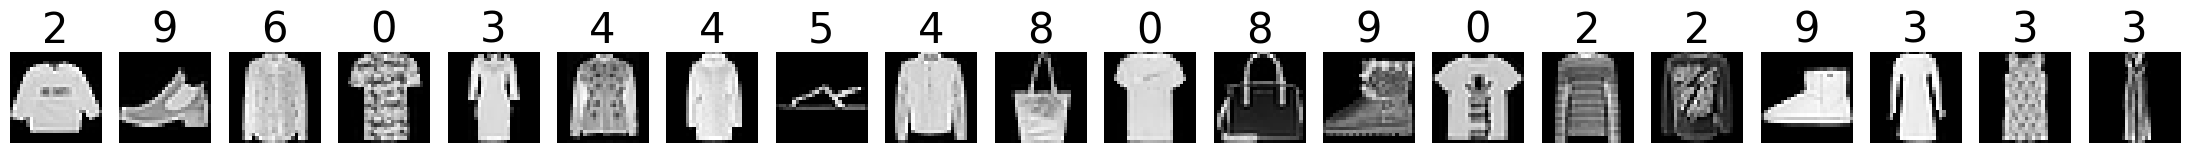

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(28,28))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

### Estructura de los datos

El dataset FashionMNIST $^1$ es un conjunto de datos de moda que comprende 70.000 imágenes distribuidas en 10 categorías populares de prendas de vestir.

La organización del dataset se estructura en dos conjuntos principales: entrenamiento (60.000 imágenes) y validación (10.000 imágenes). Cada muestra es una imagen de 28x28 pixeles en escala de grises, es decir, se tiene 784 características en un rango entre 0 y 255, dicha imagen se encuentra asociada con una etiqueta asociada a una de las 10 clases las cuales se detallan a continuación:

| Etiqueta | Descripción |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

---

$[1]$: [FashionMNIST Dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist?resource=download)

### Visualización de imagenes por clase

Para proporcionar una comprensión visual directa de las diferentes categorías de prendas en el dataset FashionMNIST, hemos seleccionado y visualizado una imagen de ejemplo para cada una de las 10 clases. Esta representación permite apreciar las características distintivas de cada tipo de prenda, facilitando la intuición sobre la tarea de clasificación que aborda nuestro modelo.

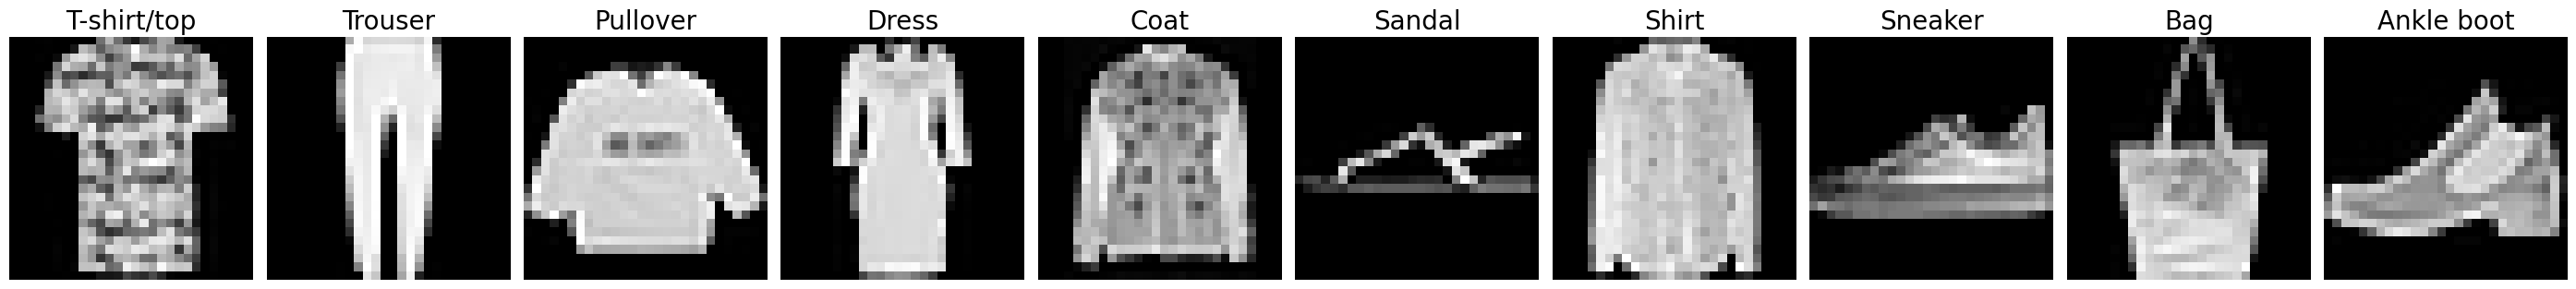

In [9]:
import numpy as np

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)

plt.figure(figsize=(28, 28)) # Ajustamos el tamaño de la figura para que quepan las 10 imágenes

indices = []
for label in range(num_classes):
    idx = np.where(y_train == label)[0][0]  # Primera ocurrencia de la etiqueta
    indices.append(idx)

# Genera una imagen por etiqueta
for i, idx in enumerate(indices):
    image = x_train[idx].reshape(28, 28)
    label = y_train[idx]

    plt.subplot(1, 10, i + 1)
    plt.title(class_names[i], fontdict={'fontsize': 20})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

plt.tight_layout()  # Mejora el espaciado
plt.show()


### Análisis de la Distribución de las Clases

Un paso crucial en el análisis de cualquier dataset de clasificación es comprender la distribución de las clases objetivo. En nuestro caso, el dataset FashionMNIST contiene 10 categorías distintas de prendas de vestir. Para asegurar un entrenamiento robusto y equitativo de nuestro modelo de aprendizaje automático, es fundamental verificar que estas clases estén representadas de manera uniforme en el conjunto de datos.

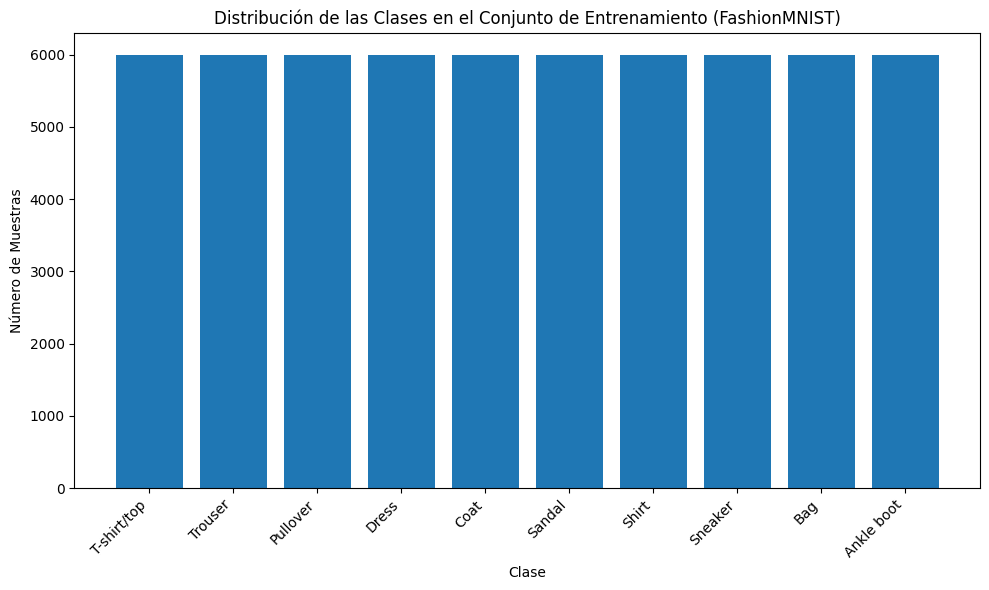

,count
label,
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000


In [10]:
y_train_series = pd.Series(y_train)

class_distribution = y_train_series.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_distribution.values)
plt.title('Distribución de las Clases en el Conjunto de Entrenamiento (FashionMNIST)')
plt.xlabel('Clase')
plt.ylabel('Número de Muestras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

class_distribution

Tras realizar el análisis de la distribución de las etiquetas en nuestro conjunto de entrenamiento, hemos observado con satisfacción una distribución perfectamente balanceada, con 6,000 muestras por cada una de las categorías de prendas.

Esta distribución uniforme es un factor muy positivo para el desarrollo de nuestro modelo, ya que minimiza el riesgo de que el clasificador se vea sesgado hacia las clases con mayor número de ejemplos. Esto nos permite anticipar un rendimiento más generalizable y equitativo en la clasificación de las diferentes prendas.

---

## 3. Preprocesamiento de los Datos.

En esta etapa, es necesario aplicar una serie de transformaciones a los datos brutos del dataset FashionMNIST con el objetivo de optimizar el rendimiento del modelo de aprendizaje automático y asegurar una convergencia más eficiente durante el entrenamiento. Los principales pasos de preprocesamiento realizados fueron:

### Normalización

Normalización de los Valores de Píxel: Los valores de los píxeles en las imágenes originales del dataset FashionMNIST se encuentran en un rango de 0 a 255. Para facilitar el aprendizaje por parte de los modelos y evitar problemas de escala, normalizamos estos valores al rango de 0 a 1.

In [11]:
# Normalización

x_train = x_train / 255
x_test = x_test / 255

### Reformado de las Imágenes

Dependiendo de la arquitectura del modelo seleccionado, las imágenes de 28x28 píxeles se reformaron a un vector unidimensional de 784 características. Esta transformación no fue necesaria de realizar ya que las imagenes vienen en este formato al ser extraídas del dataset en formato CSV y no de las imágenes originales.

### División de los Datos

El dataset FashionMNIST original se proporciona con conjuntos de entrenamiento y test. Para un desarrollo robusto del modelo, adoptamos la siguiente estrategia:
  - Conjunto de Entrenamiento:

    El conjunto de entrenamiento original se utilizará para entrenar nuestros modelos.

  - Conjunto de Prueba:

    El conjunto de prueba original se mantendrá completamente separado y se utilizará únicamente para evaluar el rendimiento final del modelo óptimo en datos que nunca ha visto antes. Esto nos dará una medida imparcial de la capacidad de generalización de nuestro modelo.

---

## 4. Selección de Modelos

Para esta etapa,  se presentan los modelos de aprendizaje automático seleccionados para abordar el problema de clasificación de prendas de vestir del dataset FashionMNIST. Dada la tarea de clasificación multiclases serán comparados modelos con distintos enfoques para abordar este problema, a pesar que, por los conocimientos y la experiencia adquirida en trabajos previos, sabemos que algunos no son especializados para la naturaleza del problema (clasificacion de imágenes).

La etapa de entrenamiento se dividió entre los distintos integrantes del equipo con tareas claras:

- Evaluar el modelo asignado utilizando distintas combinaciones de hiperpárametros con el fin de conseguir los que mejor se adapten al caso de estudio.

- Utilizar las métricas para analizar el rendimiento general del modelo con cada configuración.

- Basado en las métricas, tomar el modelo optimal y guardarlo en un archivo `.pkl` con el fin de poder utilizarlo en la aplicación.

- Analizar los resultados obtenidos para el enfoque asignado y generar un notebook explicando el proceso.

Posteriormente, será realizada una discusión entre los integrantes, para  comparador los resultados obtenidos por cada uno, y así decidir el modelo que será utilizado en la aplicación.

### Arboles de Decisión

### Red Neuronal Feedforward Simple (Simple FNN)

### Red Neuronal Convolucional (CNN)

### Nota:

El proceso de entrenamiento con el respectivo resultado de cada uno de los modelos se encuentran disponibles en la ruta de este mismo documento.

---

## 5. Resultados y discusión

Para esta sección final, se comparan los resultados obtenidos por los tres modelos óptimos entrenados para la clasificación del conjunto de datos FashionMNIST: una Red Neuronal Feedforward (FNN), una Red Neuronal Convolucional (CNN) y un Árbol de Decisión (CART).

### Arboles de Decisión (CART)

- Precisión: 81%
- F1-score: 0.81
- Matriz de Confusión: (Ver imagen adjunta)

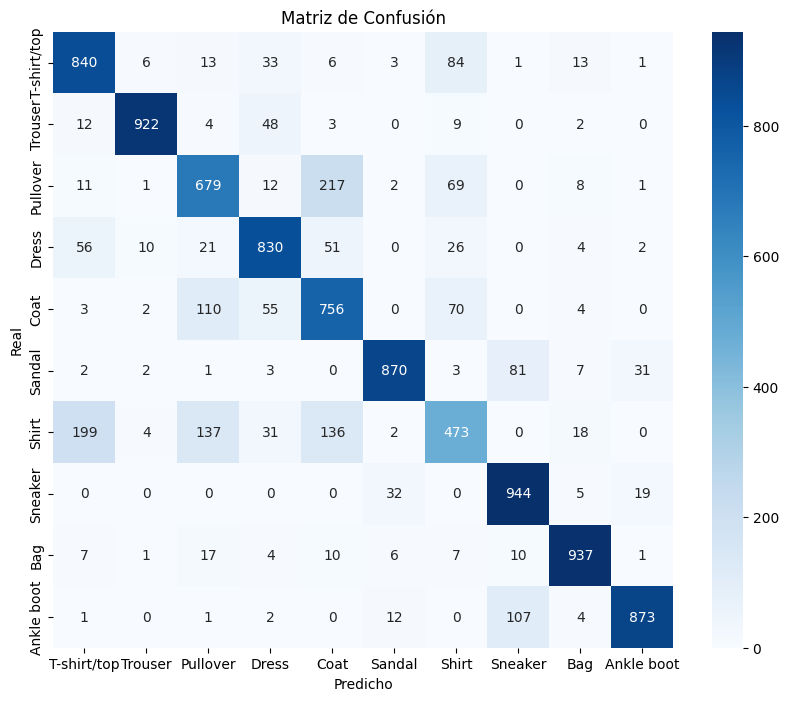
<p align="center"><em>Imagen 1. Matriz de Confusión de CART</em></p>

### Red Neuronal Feedforward (FNN)

#### Métricas:

- Precisión: 88.14%
- F1-score: 0.8808
- Matriz de Confusión: (Ver imagen adjunta)

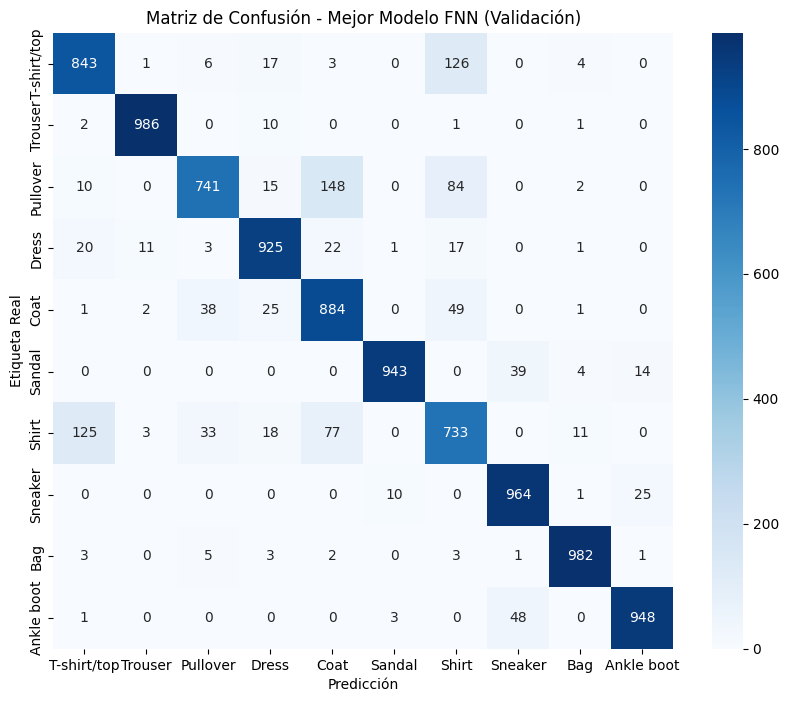
<p align="center"><em>Imagen 2. Matriz de Confusión de FNN</em></p>

### Red Neuronal Convolucional (CNN)

#### Métricas:

- Precisión: 92%
- F1-score: 0.92
- Matriz de Confusión: (Ver imagen adjunta)

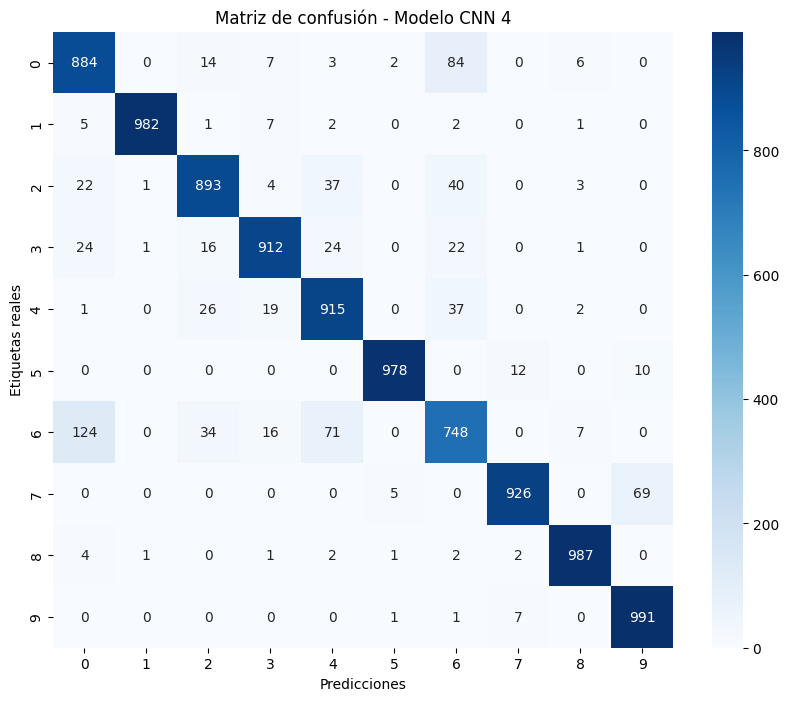
<p align="center"><em>Imagen 3. Matriz de Confusión de CNN</em></p>

### Rendimiento general

La CNN demostró ser el modelo con el rendimiento general más alto, alcanzando una precisión del 92% y un F1-score de 0.92. Esto sugiere que la arquitectura convolucional es muy efectiva para extraer características relevantes de las imágenes de prendas de vestir.

El modelo FNN obtuvo un rendimiento intermedio, con una precisión de validación del 88.14% y un F1-score de 0.8808. Aunque no superó a la CNN, mostró una capacidad considerable para clasificar las imágenes, a pesar de no estar diseñado específicamente para datos espaciales como las imágenes.

El Árbol de Decisión (CART) fue el modelo con el rendimiento más bajo, logrando una precisión del 81% y un F1-score de 0.81. Si bien los árboles de decisión pueden ser útiles para ciertas tareas de clasificación, su incapacidad inherente para capturar relaciones espaciales complejas en las imágenes probablemente limitó su rendimiento en este caso.

### Análisis de las Matrices de Confusión

La matriz de confusión de la CNN (ver Imagen 1) revela un alto número de clasificaciones correctas en la diagonal principal para la mayoría de las clases. Sin embargo, se observaron algunas confusiones notables entre 'T-shirt/top' y 'Shirt', así como entre 'Pullover' y 'Coat', lo cual es comprensible dada la similitud visual entre estas categorías.

La matriz de confusión del FNN (ver Imagen 2) también muestra un buen rendimiento general, aunque con un mayor número de errores fuera de la diagonal en comparación con la CNN. Al igual que la CNN, el FNN tuvo dificultades para distinguir entre `T-shirt/top` y `Shirt`, y también mostró confusiones entre `Pullover` y `Coat`, y en menor medida entre `Shirt` y otras prendas de la parte superior.

La matriz de confusión del Árbol de Decisión (CART) (ver Imagen 3) indica un rendimiento más variable entre las clases. Si bien logró clasificar correctamente una proporción razonable de instancias en algunas categorías como `Trouser`, `Sandal` y `Bag`, tuvo un rendimiento significativamente menor en otras, como `Shirt`, que se confundió con frecuencia con `T-shirt/top` y `Pullover`. Esto se refleja también en el reporte de clasificación del CART, que mostró F1-scores más bajos para estas clases.

### Discusión

La superioridad de la CNN en esta tarea subraya la importancia de las arquitecturas especializadas para el procesamiento de imágenes. Su capacidad para aprender jerarquías de características espaciales a través de capas convolucionales y de pooling le permite extraer patrones más discriminativos de las imágenes de FashionMNIST en comparación con la FNN, que trata cada imagen como un vector plano, perdiendo la información espacial inherente.

El rendimiento del FNN, aunque inferior al de la CNN, demuestra que una red neuronal básica puede aprender características útiles para la clasificación de imágenes, especialmente cuando el conjunto de datos es relativamente simple como FashionMNIST. Sin embargo, sufre más confusiones entre clases visualmente similares debido a la falta de comprensión de la estructura espacial de las imágenes.

El rendimiento más bajo del Árbol de Decisión sugiere que los modelos basados en árboles son menos adecuados para tareas complejas de clasificación de imágenes como esta, donde las relaciones entre los píxeles son cruciales. Si bien los árboles pueden capturar algunas características basadas en los valores de los píxeles individuales, carecen de la capacidad de aprender patrones complejos y abstractos que pueden identificar las redes neuronales.

### Conclusiones y Recomendaciones

En resumen, el modelo de Red Neuronal Convolucional (CNN) demostró ser la arquitectura más efectiva para la tarea de clasificación del conjunto de datos FashionMNIST, superando tanto a la Red Neuronal Feedforward (FNN) como al Árbol de Decisión (CART) en términos de precisión y F1-score. La capacidad de la CNN para aprender características espaciales complejas directamente de las imágenes le permitió lograr un rendimiento superior en la identificación de las diferentes prendas de vestir.

Si bien los resultados obtenidos con la CNN en el dataset FashionMNIST son prometedores, es importante reconocer las limitaciones inherentes de este conjunto de datos. FashionMNIST es una colección de imágenes en escala de grises de baja resolución (28x28 píxeles) y las prendas de vestir a menudo están centradas y bien definidas. En escenarios del mundo real, las imágenes de moda pueden ser mucho más complejas, con variaciones en la pose, el fondo, la iluminación y la presencia de múltiples artículos en una misma imagen.

Para futuros trabajos, y si se dispusiera de más tiempo y recursos computacionales, se recomienda explorar conjuntos de datos más desafiantes como [DeepFashion](https://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html). **DeepFashion** contiene una gran cantidad de imágenes de ropa de alta resolución con una mayor variabilidad y complejidad, lo que permitiría evaluar la robustez y la capacidad de generalización de los modelos en condiciones más realistas.

En conclusión, aunque el modelo CNN mostró un rendimiento sobresaliente en FashionMNIST, la exploración de conjuntos de datos más complejos y técnicas de modelado avanzadas sería un paso importante para abordar los desafíos de la clasificación de moda en escenarios del mundo real.